In [6]:
def read_genome(filename):
    # read the genome file
    genome= ''
    for line in open(filename):
        if line[0] != '>':
            genome += line.rstrip()
    return(genome)

genome= read_genome('lambda_virus.fa')
print(genome[:300])
print('length %s' %len(genome))

GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAA
length 48502


In [21]:
def read_seq(filename):
    #read the sequence files
    qual_scores= []
    sequences= []
    #i=0
    with open(filename) as file:
        while(True):
            #i += 1
            #print('i: %i' %i)

            file.readline() #ignore
            seq= file.readline().rstrip() #quality
            file.readline() #ignore
            qual= file.readline().rstrip()
            #print('seq: %s' %seq)

            if len(seq) == 0:
                break
            qual_scores.append(qual)
            sequences.append(seq)
    return(qual_scores,sequences)

quals, seqs= read_seq('ERR037900_1.first1000.fastq')
print(quals[:5])
print(len(seqs))

min_len= 10000
max_len= 0
for s in seqs:
    length= len(s)
    if length < min_len:
        min_len= length
    if length > max_len:
        max_len= length

print('length from %i to %i' %(min_len, max_len))

['HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHDHHHDEHHHHFGIHEHEGGGF4#45655366GIGEHAGBG################', 'HHHHHHHHHHHHHHHHHHHHHHHHHIHHHHHHHHHHHHHHHHHHHHHHIHHHHHIHFHHHIHHHHD#ECA54655GGIBH?BD@+BCBF?5A=::>8?##', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIHEHHIGHIFFHIIGF6#555:2=7=CB;?3CAACBAC2B###########']
1000
length from 100 to 100


In [8]:
def rev_comp(seq):
    #get reverse complement
    ATGC_dict= {'A':'T', 'T':'A', 'C':'G', 'G':'C', 'N':'N'}
    RC= ''
    i= len(seq)-1
    while i>=0:
        RC += ATGC_dict[seq[i]]
        i -= 1
    return(RC)

rev_comp('TCTAG')

'CTAGA'

In [25]:
def to_score(char):
    #convert from ASCII character to number
    score= ord(char)-33
    return(score)

print('@ is %i' % to_score('@'))
print('N is %i' % to_score('N'))

@ is 31
N is 45


In [34]:
def score_by_pos(seqL):
    #get score by position
    posScore= [0]*100
    numSeqs= len(seqL)
    for i in seqL:
        for j in range(len(i)):
            posScore[j] += ord(i[j])-33
    
    avgPosScore= [0]*100
    for j in range(len(posScore)):
        avgPosScore[j]= posScore[j]/numSeqs
    return(avgPosScore)

print('scores:', score_by_pos(['@@HH','##@@']))

scores: [16.5, 16.5, 35.0, 35.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [11]:
def naive(pattern, text):
    #naive pattern match
    matchPosL=[]
    for i in range(len(text) - len(pattern) + 1):
        match= True
        #print('i: %i' %i)
        for j in range(len(pattern)):
            #print('\tj: %i' %j)
            if text[i+j] != pattern[j]:
                match= False
                break
        if match== True:
            matchPosL.append(i)
            #print('Match!')
    return(matchPosL)

print( naive('TCT', 'AATCTA') )
print( naive('TCT', 'AATCTATCT') )

[2]
[2, 6]


In [12]:
def naive_2mm(pattern, text):
    #naive pattern match, allowing two mismatches
    matchPosL=[]
    for i in range(len(text) - len(pattern) + 1):
        MM= 0
        #print('i: %i' %i)
        for j in range(len(pattern)):
            #print('\tj: %i' %j)
            if text[i+j] != pattern[j]:
                MM += 1
            if MM > 2:
                break
        if MM<= 2:
            matchPosL.append(i)
            #print('Match! (MM: %i)' %MM)
    return(matchPosL)

print( naive_2mm('TCT', 'AAACTA') )
print( naive('TCT', 'AATCTATCT') )

[2]
[2, 6]


In [13]:
#How many times does AGGT or its reverse complement (ACCT) occur in the lambda virus genome?  

fwd_matches= len( naive(pattern= 'AGGT', text=genome) )

RC= rev_comp('AGGT')
print('RC: %s' % RC)
rv_matches= len( naive(pattern=RC, text= genome))

print('%i forward and %i reverse matches' % (fwd_matches, rv_matches))

RC: ACCT
150 forward and 156 reverse matches


In [14]:
#How many times does TTAA or its reverse complement occur in the lambda virus genome?  
fwd_matches= len( naive(pattern= 'TTAA', text=genome) )
print('%i forward matches' %fwd_matches)

195 forward matches


In [15]:
#Question 3: What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement in the Lambda virus genome?
fwd_matches= naive(pattern= 'ACTAAGT', text= genome)
rev_matches= naive(pattern=rev_comp('ACTAAGT'), text= genome)
print( min([fwd_matches[0],rev_matches[0]]))

26028


In [16]:
#What is the offset of the leftmost occurrence of AGTCGA or its reverse complement in the Lambda virus genome?
fwd_matches= naive(pattern= 'AGTCGA', text= genome)
rev_matches= naive(pattern=rev_comp('AGTCGA'), text= genome)
print( min([fwd_matches[0],rev_matches[0]]))

450


In [17]:
#How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches?
print( len(naive_2mm('TTCAAGCC',genome)))

191


In [18]:
#What is the offset of the leftmost occurrence of AGGAGGTT in the Lambda virus genome when allowing up to 2 mismatches?
print(naive_2mm('AGGAGGTT',genome))

[49, 282, 299, 302, 380, 1560, 1650, 2235, 2277, 2400, 2562, 2565, 2729, 2823, 3160, 3181, 3946, 4210, 4294, 4309, 4405, 4580, 5069, 5159, 5189, 5231, 5331, 5519, 5737, 5882, 5993, 5996, 6011, 6312, 6522, 6585, 6606, 7316, 7394, 7819, 7904, 7966, 7998, 8534, 8648, 8946, 9339, 9354, 9530, 9842, 9966, 10041, 10250, 10416, 10445, 10484, 10527, 10874, 11193, 11292, 11505, 11568, 11655, 11745, 11838, 12078, 12180, 12222, 12697, 12745, 12819, 12880, 12935, 13011, 13087, 13256, 13415, 13526, 13813, 14259, 15385, 15473, 16192, 17101, 17437, 17755, 17936, 17989, 18016, 18040, 18727, 18853, 18911, 19232, 19263, 19310, 19833, 19929, 19932, 19947, 19980, 20793, 20802, 21305, 21528, 21627, 21684, 22414, 22660, 22670, 22787, 23326, 24063, 24145, 24409, 24595, 24681, 25120, 25139, 25210, 25381, 25384, 25648, 25664, 25773, 25987, 26196, 26208, 26576, 26587, 26653, 26736, 27892, 27967, 28042, 28622, 28840, 28976, 29119, 30029, 30530, 30673, 30902, 31619, 31645, 31682, 31843, 31859, 32069, 33180, 33365,

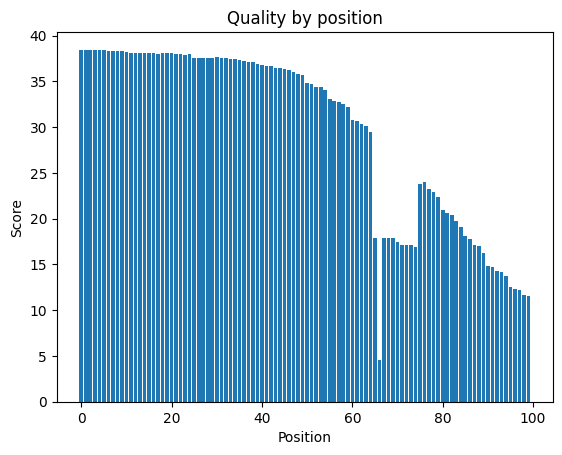

[38.435, 38.46, 38.4, 38.428, 38.417, 38.382, 38.362, 38.364, 38.325, 38.343, 38.194, 38.154, 38.089, 38.152, 38.153, 38.099, 38.055, 38.041, 38.067, 38.15, 38.087, 37.989, 38.009, 37.909, 38.028, 37.576, 37.514, 37.503, 37.578, 37.552, 37.629, 37.555, 37.548, 37.433, 37.402, 37.343, 37.198, 37.126, 37.158, 36.904, 36.742, 36.677, 36.645, 36.493, 36.509, 36.375, 36.205, 35.974, 35.847, 35.673, 34.832, 34.739, 34.399, 34.402, 34.025, 33.025, 32.882, 32.741, 32.573, 32.224, 30.805, 30.666, 30.343, 30.131, 29.463, 17.891, 4.526, 17.881, 17.865, 17.852, 17.466, 17.131, 17.134, 17.098, 16.852, 23.745, 23.958, 23.221, 22.902, 22.366, 20.904, 20.584, 20.383, 19.767, 19.095, 18.061, 17.757, 17.152, 16.972, 16.286, 14.811, 14.679, 14.31, 14.152, 13.734, 12.538, 12.278, 12.179, 11.676, 11.561]
66


In [39]:
import matplotlib.pyplot as plt
import numpy as np

qual, _ = read_seq('ERR037900_1.first1000.fastq')
# qual_scores= [0]*200
# for i in qual:
#     for j in range(len(i)):
#         score= to_score(i[j])
#         qual_scores[score] += 1

# print(qual_scores)
# plt.plot(range(len(qual_scores)),qual_scores)
# plt.show()

cnts= score_by_pos(qual)
#plt.plot(range(len(cnts)),cnts)
plt.bar(range(len(cnts)),cnts)
plt.xlabel('Position')
plt.ylabel('Score')
plt.title('Quality by position')
plt.show()
print(cnts)
cnts_array= np.array(cnts)
#print(cnts_array == max(cnts_array))
print(np.argmin(cnts_array))

In [30]:
# 72 == H

H_count= 0
total= 0
for q in qual:
    for letter in q:
        if letter == 'H':
            H_count += 1
        total += 1

print('%i of %i letters are H' % (H_count, total))

45696 of 100000 letters are H
